Libraries for using petri-nets in julia

In [2]:
using Catlab, Catlab.CategoricalAlgebra, Catlab.Programs, Catlab.WiringDiagrams, Catlab.Graphics 
using AlgebraicPetri 
using AlgebraicDynamics.UWDDynam 

using DifferentialEquations 

using LabelledArrays 
using Plots

Made the SIR model I made which is explained in my report for week 5. There, I used C code which made me use probablities and check time for each element. Here, I used a petri-net which solves a differential equation set. (Actually I made a cospan with one petri-net)

In [10]:
# My model
SIR = Open(LabelledPetriNet(
    # Defining places
    [:Sv, :Sn, :Iv, :In, :Rv, :Rn],
    # Defining Transitions
    :alpha => ((:Sn) => (:In)),
    :beta => ((:Sv, :In) => (:Iv, :In)),
    :gamma_max => ((:Iv) => (:Rv)),
    :gamma_min => ((:In) => (:Rn)),
    :tau_v => ((:Rv) => (:Sv)),
    :tau_n => ((:Rn) => (:Sn))
))

StructuredMulticospan{Catlab.CategoricalAlgebra.StructuredCospans.DiscreteACSet{AnonACSet{TypeLevelBasicSchema{Symbol, Tuple{:S}, Tuple{}, Tuple{:Name}, Tuple{(:sname, :S, :Name)}, Tuple{}}, Tuple{Symbol}, @NamedTuple{S::IntParts, Name::IntParts}, @NamedTuple{sname::ACSets.ColumnImplementations.DenseColumn{Union{AttrVar, Symbol}, Vector{Union{AttrVar, Symbol}}}}, IntParts}, LabelledPetriNet}, SMulticospan{6, LabelledPetriNet, StructTightACSetTransformation{TypeLevelBasicSchema{Symbol, Tuple{:T, :S, :I, :O}, Tuple{(:it, :I, :T), (:is, :I, :S), (:ot, :O, :T), (:os, :O, :S)}, Tuple{:Name}, Tuple{(:tname, :T, :Name), (:sname, :S, :Name)}, Tuple{}}, @NamedTuple{T::Catlab.CategoricalAlgebra.FinSets.FinDomFunctionVector{Int64, Vector{Int64}, Catlab.CategoricalAlgebra.FinSets.FinSetInt}, S::Catlab.CategoricalAlgebra.FinSets.FinDomFunctionVector{Int64, Vector{Int64}, Catlab.CategoricalAlgebra.FinSets.FinSetInt}, I::Catlab.CategoricalAlgebra.FinSets.FinDomFunctionVector{Int64, Vector{Int64}, Cat

Viewing the structure of the petri-net.

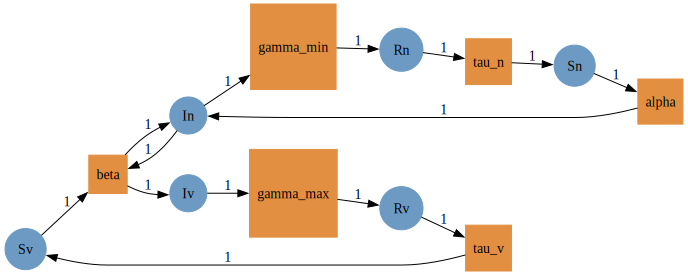

In [4]:
to_graphviz(SIR, program="neat")

p is the set of parameters, u0 is the set of initial values

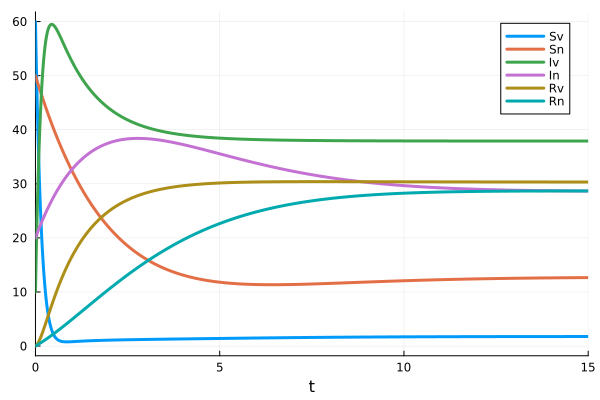

In [47]:
p = LVector(alpha=0.45, beta=0.3, gamma_max=0.4, gamma_min=0.2, tau_v=0.5, tau_n=0.2)
u0 = LVector(Sv=60, Sn=50, Iv=10, In=20, Rv=0, Rn=0)
soln = solve(ODEProblem(vectorfield(apex(SIR)), u0, (0.0, 15.0), p))
plot(soln, lw=3)

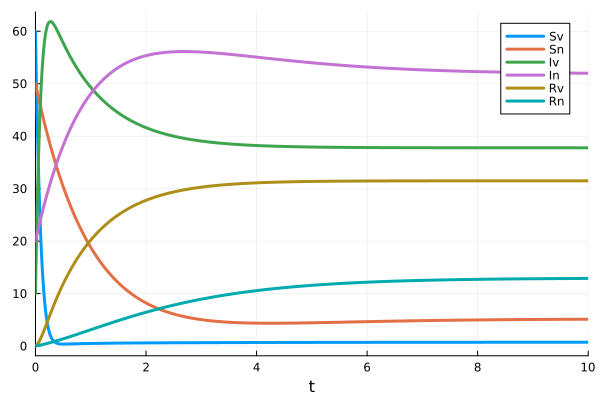

In [45]:
p = LVector(alpha=1, beta=0.5, gamma_max=0.5, gamma_min=0.1, tau_v=0.6, tau_n=0.4)
u0 = LVector(Sv=60, Sn=50, Iv=10, In=20, Rv=0, Rn=0)
soln = solve(ODEProblem(vectorfield(apex(SIR)), u0, (0.0, 10.0), p))
plot(soln, lw=3)